In [1]:
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings('ignore')

전체 기간 데이터 기업 수

In [2]:
df = pd.read_csv("../data/5. label 지정 완료.csv",encoding='cp949')
print('정상기업:',len(df[df['label'] == 0]['회사명'].unique()))
print('부실기업:',len(df[df['label'] == 1]['회사명'].unique()))

정상기업: 1089
부실기업: 286


In [3]:
df['회계년도'] = df['회계년도'].astype(str)
df1 = df[['재고자산증가율','순이익증가율','자기자본순이익률','1주당매출액','매출채권회전률','1회전기간','순운전자본비율','이자보상배율이자비용','이윤분배율','설비투자효율','label']].describe()

# 데이터프레임 내의 실수형 데이터를 실수 형식으로 표시 설정
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Train 훈련 데이터 : 2011.01~2012.12(회계년도 기준)

In [31]:
train = df[df["회계년도"]<="2012-12-31"]
train.reset_index(inplace=True,drop=True)

print('데이터 총 기업수 :',len(train["회사명"].unique()))
print('정상기업:',len(train[train['label'] == 0]['회사명'].unique()))
print('부실기업:',len(train[train['label'] == 1]['회사명'].unique()))
print('정상기업 백분율 :', len(train[train['label']==0]['회사명'].unique())/len(train['회사명'].unique())*100)
print('부실기업 백분율 :', len(train[train['label']==1]['회사명'].unique())/len(train['회사명'].unique())*100)

데이터 총 기업수 : 729
정상기업: 657
부실기업: 72
정상기업 백분율 : 90.12345679012346
부실기업 백분율 : 9.876543209876543


Test1(확장기) : 2013.01 ~ 2017.12(회계년도 기준)

In [30]:
de1 = df[df["회계년도"]>="2018"].index
de2 = df[df["회계년도"]<="2013"].index
test1 = df.drop(de1)
test1 = test1.drop(de2)
test1.reset_index(inplace=True,drop=True)

print('데이터 총 기업수 :',len(test1["회사명"].unique()))
print('정상기업:',len(test1[test1['label'] == 0]['회사명'].unique()))
print('부실기업:',len(test1[test1['label'] == 1]['회사명'].unique()))
print('정상기업 백분율 :', len(test1[test1['label']==0]['회사명'].unique())/len(test1['회사명'].unique())*100)
print('부실기업 백분율 :', len(test1[test1['label']==1]['회사명'].unique())/len(test1['회사명'].unique())*100)

데이터 총 기업수 : 949
정상기업: 869
부실기업: 80
정상기업 비율 : 91.57007376185459
부실기업 비율 : 8.429926238145416


Test2(수축기) : 2018.01 ~ 2019.12(회계년도 기준)

In [51]:
de1 = df[df["회계년도"]<="2018"].index
de2 = df[df["회계년도"]>="2020-12-01"].index
test2 = df.drop(de1)
test2 = test2.drop(de2)
test2.reset_index(inplace=True,drop=True)

print('데이터 총 기업수 :',len(test2["회사명"].unique()))
print('정상기업:',len(test2[test2['label'] == 0]['회사명'].unique()))
print('부실기업:',len(test2[test2['label'] == 1]['회사명'].unique()))
print('정상기업 백분율 :', len(test2[test2['label']==0]['회사명'].unique())/len(test2['회사명'].unique())*100)
print('부실기업 백분율 :', len(test2[test2['label']==1]['회사명'].unique())/len(test2['회사명'].unique())*100)

데이터 총 기업수 : 1100
정상기업: 1003
부실기업: 98
정상기업 백분율 : 91.18181818181819
부실기업 백분율 : 8.90909090909091


데이터 불균형 확인

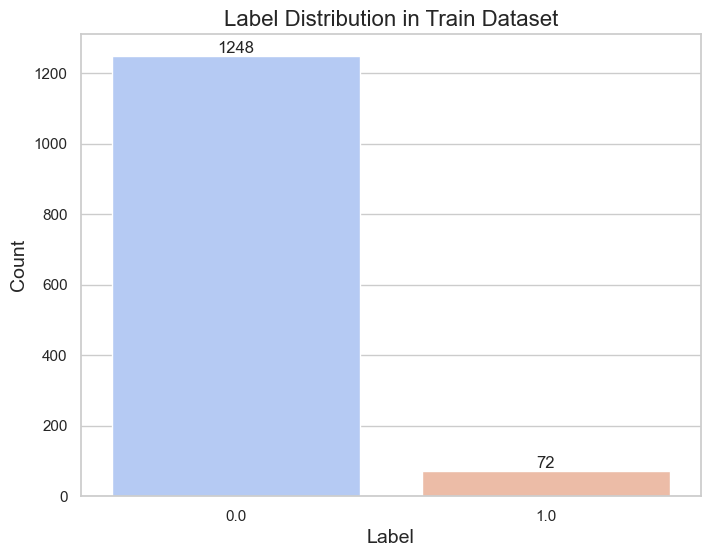

In [36]:
# seaborn 스타일 설정
sns.set(style="whitegrid")

# 라벨의 분포 계산
label_counts = train['label'].value_counts()

# 데이터 준비
labels = label_counts.index
counts = label_counts.values

# 바 차트 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.barplot(x=labels, y=counts, palette="coolwarm")  # seaborn 바 차트 사용

# 제목 및 레이블 설정
plt.title('Label Distribution in Train Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)

# 각 바에 대한 값을 표시
for i in range(len(labels)):
    plt.text(i, counts[i], counts[i], ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0)  # x축 라벨 수평으로 설정
plt.show()

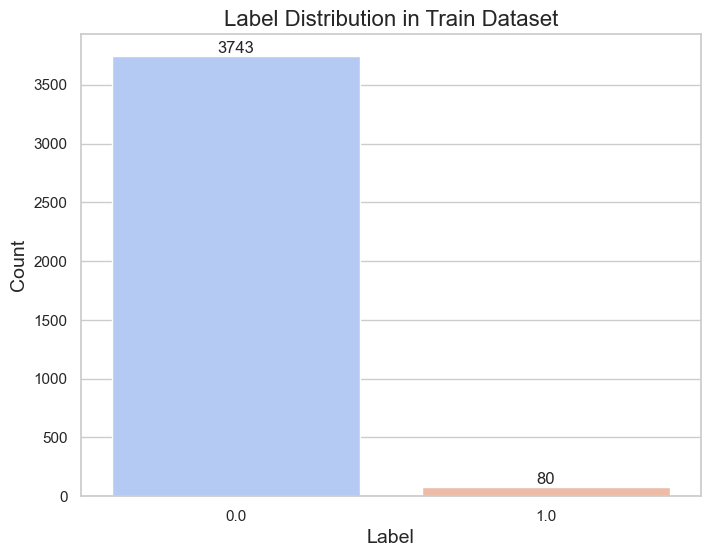

In [42]:
# seaborn 스타일 설정
sns.set(style="whitegrid")

# 라벨의 분포 계산
label_counts = test1['label'].value_counts()

# 데이터 준비
labels = label_counts.index
counts = label_counts.values

# 바 차트 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.barplot(x=labels, y=counts, palette="coolwarm")  # seaborn 바 차트 사용

# 제목 및 레이블 설정
plt.title('Label Distribution in Train Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)

# 각 바에 대한 값을 표시
for i in range(len(labels)):
    plt.text(i, counts[i], counts[i], ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0)  # x축 라벨 수평으로 설정
plt.show()

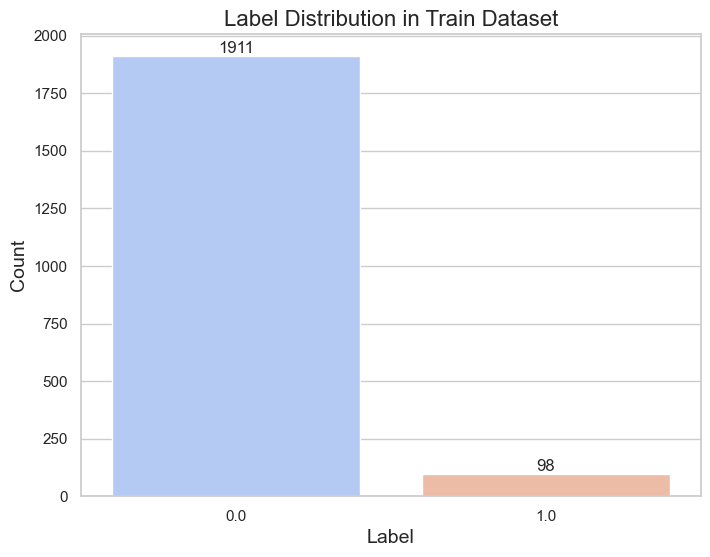

In [43]:
# seaborn 스타일 설정
sns.set(style="whitegrid")

# 라벨의 분포 계산
label_counts = test2['label'].value_counts()

# 데이터 준비
labels = label_counts.index
counts = label_counts.values

# 바 차트 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.barplot(x=labels, y=counts, palette="coolwarm")  # seaborn 바 차트 사용

# 제목 및 레이블 설정
plt.title('Label Distribution in Train Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)

# 각 바에 대한 값을 표시
for i in range(len(labels)):
    plt.text(i, counts[i], counts[i], ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0)  # x축 라벨 수평으로 설정
plt.show()

In [64]:
# train, test1, test2 데이터 불균형 확인하기
print('train data')
print('부도기업:',len(train[train["label"]==1]))
print('정상기업:',len(train[train["label"]==0]))
print('test1 data')
print('부도기업:',len(test1[test1["label"]==1]))
print('정상기업:',len(test1[test1["label"]==0]))
print('test2 data')
print('부도기업:',len(test2[test2["label"]==1]))
print('정상기업:',len(test2[test2["label"]==0]))

train data
부도기업: 72
정상기업: 1248
test1 data
부도기업: 80
정상기업: 3743
test2 data
부도기업: 98
정상기업: 1911


In [56]:
train.to_csv("../data/6. train.csv")
test1.to_csv("../data/6. test1.csv")
test2.to_csv("../data/6. test2.csv")